In [33]:

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from PIL import Image

import glob

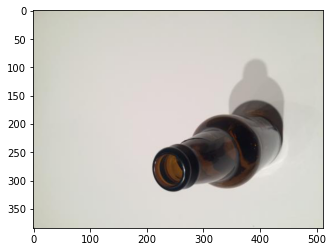

In [6]:
img = Image.open("C:/Users/82104/Desktop/hackathon/dataset/train/glass/glass1.jpg")

plt.imshow(img)

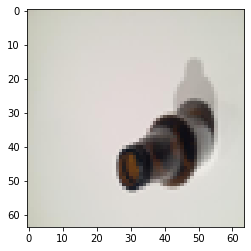

In [7]:
plt.imshow(img.resize([64,64]))

In [8]:
data = img.convert("RGB")

In [9]:
data = data.resize([64,64])

In [10]:
data = np.asarray(data)

In [11]:
data.reshape([1,64,64,3])

array([[[[193, 191, 178],
         [196, 194, 181],
         [196, 197, 183],
         ...,
         [203, 203, 191],
         [202, 202, 193],
         [201, 201, 188]],

        [[194, 192, 179],
         [198, 196, 183],
         [198, 199, 185],
         ...,
         [204, 204, 192],
         [203, 203, 193],
         [202, 203, 190]],

        [[196, 195, 181],
         [199, 199, 185],
         [200, 200, 187],
         ...,
         [205, 206, 195],
         [204, 205, 195],
         [202, 203, 190]],

        ...,

        [[200, 201, 187],
         [202, 203, 189],
         [204, 205, 191],
         ...,
         [217, 218, 210],
         [216, 218, 207],
         [215, 217, 206]],

        [[200, 201, 187],
         [202, 203, 189],
         [204, 205, 191],
         ...,
         [217, 218, 210],
         [216, 218, 205],
         [215, 217, 204]],

        [[195, 196, 182],
         [201, 202, 188],
         [202, 203, 189],
         ...,
         [216, 217, 209],
        

In [12]:
data.shape

(64, 64, 3)

CNN

In [13]:
from sklearn.model_selection import train_test_split

from PIL import Image

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

import glob

In [14]:
data_dir="C:/Users/82104/Desktop/hackathon/dataset/train"

In [15]:
categories = ['glass', 'pet']
nb_class = len(categories)

In [16]:
image_w = 64

image_h = 64

pixels = image_w * image_h * 3

In [17]:
# 이미지마다 원핫 인코딩

x = []

y = []

# 폴더안에 있는 데이터 다 가져오기
# enumerate() : 리스트의 순서와 값 반환
for idx, c in enumerate(categories):

    label = [0 for i in range(nb_class)]

    label[idx] = 1

    image_dir = data_dir+"/"+c

    files = glob.glob(image_dir+"/*.jpg")

    # print(files)

    # 파일안에 있는 이미지 오픈해서 어레이값으로 변경

    for i, f in enumerate(files):

        img = Image.open(f)

        img = img.convert("RGB")

        img = img.resize((image_w,image_h))

        data = np.asarray(img)

        x.append(data)

        y.append(label)

In [18]:
x = np.array(x)

x.shape

y = np.array(y)

y.shape

(901, 2)

In [19]:
X_train, X_test, Y_train,Y_test = train_test_split(x, y, test_size=0.2)

In [28]:
image_data = (X_train, X_test, Y_train,Y_test)
np.save("C:/Users/82104/Desktop/hackathon/dataset/train/glass_pet_image_data.npy",image_data)

In [29]:
X_train, X_test, Y_train,Y_test = np.load("C:/Users/82104/Desktop/hackathon/dataset/train/glass_pet_image_data.npy",allow_pickle=True)

X_train.shape

X_test.shape

Y_train.shape

X_test.shape

(181, 64, 64, 3)

In [34]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [35]:
x = tf.placeholder(tf.float32,[None,64,64,3])

y = tf.placeholder(tf.float32,[None,2])

In [36]:
w1 = tf.Variable(tf.random_normal([3,3,3,32],stddev=0.01))

In [37]:
L1 = tf.nn.conv2d(x,w1,strides=[1,1,1,1],padding='SAME')

L1

<tf.Tensor 'Conv2D:0' shape=(?, 64, 64, 32) dtype=float32>

In [38]:
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L1

<tf.Tensor 'MaxPool:0' shape=(?, 32, 32, 32) dtype=float32>

In [39]:
w2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))

L2 = tf.nn.conv2d(L1,w2,strides=[1,1,1,1],padding='SAME')
L2

<tf.Tensor 'Conv2D_1:0' shape=(?, 32, 32, 64) dtype=float32>

In [40]:
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L2

<tf.Tensor 'MaxPool_1:0' shape=(?, 16, 16, 64) dtype=float32>

In [41]:
w3 = tf.Variable(tf.random_normal([3,3,64,64],stddev=0.01))
L3 = tf.nn.conv2d(L2,w3,strides=[1,1,1,1],padding='SAME')
L3

<tf.Tensor 'Conv2D_2:0' shape=(?, 16, 16, 64) dtype=float32>

In [42]:
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [43]:
w4 = tf.Variable(tf.random_normal([8*8*64,256],stddev=0.01))
w4

<tf.Variable 'Variable_3:0' shape=(4096, 256) dtype=float32_ref>

In [44]:
L4 = tf.reshape(L3,[-1,8*8*64])

L4

<tf.Tensor 'Reshape:0' shape=(?, 4096) dtype=float32>

In [45]:
L4 = tf.nn.relu(tf.matmul(L4,w4))
L4

<tf.Tensor 'Relu_3:0' shape=(?, 256) dtype=float32>

In [46]:
w5 = tf.Variable(tf.random_normal([256,2],stddev=0.01))
w5

<tf.Variable 'Variable_4:0' shape=(256, 2) dtype=float32_ref>

In [47]:
model = tf.matmul(L4,w5)
model

<tf.Tensor 'MatMul_1:0' shape=(?, 2) dtype=float32>

In [53]:
hypothesis = tf.nn.softmax(model)

In [54]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model,labels=y))

In [55]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [56]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

In [57]:
batch_size = 100

for epoch in range(1,11):

    avg_cost = 0
    # 배치사이즈만큼 뽑아서 사용

    for i in range(int(np.ceil(len(X_train)/batch_size))):

        x_ = X_train[batch_size*i : batch_size*(i+1)]

        y_ = Y_train[batch_size*i : batch_size*(i+1)]

        _,cost_val = sess.run([optimizer,cost],
                                   feed_dict={x:x_,y:y_})

        avg_cost += cost_val

    print('Epoch:','%04d'%(epoch),
           'cost: ','{:.9f}'.format(avg_cost/len(X_train)))

Epoch: 0001 cost:  0.007686182
Epoch: 0002 cost:  0.007688258
Epoch: 0003 cost:  0.007696060
Epoch: 0004 cost:  0.007650639
Epoch: 0005 cost:  0.007735633
Epoch: 0006 cost:  0.007672921
Epoch: 0007 cost:  0.007653184
Epoch: 0008 cost:  0.007630406
Epoch: 0009 cost:  0.007670113
Epoch: 0010 cost:  0.007640144


In [58]:
is_correct = tf.equal(tf.argmax(hypothesis,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
print("정확도 : ",sess.run(accuracy,feed_dict={x:X_test,y:Y_test}))

정확도 :  0.5801105


Prediction :  [1]


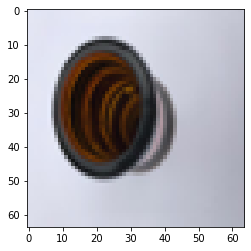

In [59]:
plt.imshow(X_test[15],cmap='Greys')

data = X_test[15].reshape([1,64,64,3])

print("Prediction : ",sess.run(tf.argmax(hypothesis,1),feed_dict={x:data}))